Text(0, 0.5, 'X2: Petal Width')

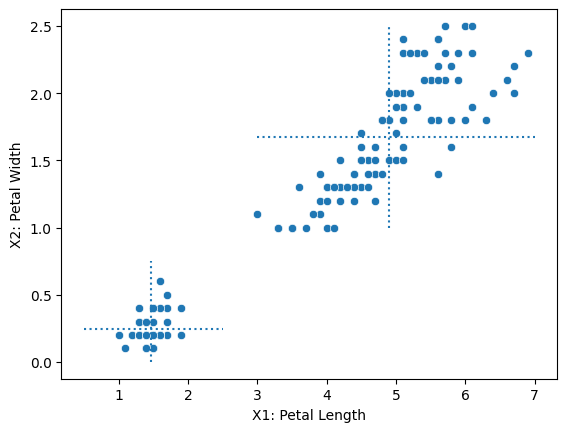

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Feature selection
y = iris.target
sns.scatterplot(x=X[:,0], y=X[:,1])
plt.vlines(X[:50,0].mean(), 0, 0.75, linestyles="dotted")
plt.hlines(X[:50,1].mean(), 0.5, 2.5, linestyles="dotted")

plt.vlines(X[50:,0].mean(), 1, 2.5, linestyles="dotted")
plt.hlines(X[50:,1].mean(), 3, 7, linestyles="dotted")
plt.xlabel('X1: Petal Length')
plt.ylabel('X2: Petal Width')

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/450px-Euclidean_distance_2d.svg.png)

In [ ]:
# Step 0
# Init the clusters centroids
from scipy.spatial.distance import euclidean

np.random.seed(1)
centroid_index = np.random.randint(len(X), size=2)
print("Centroids", centroid_index)
X[0], X[37], euclidean(X[0], X[37]), np.sqrt((X[0][0] - X[37][0])**2 + (X[0][1] - X[37][1])**2)

Centroids [ 37 140]


(array([1.4, 0.2]), array([1.4, 0.1]), 0.1, 0.1)

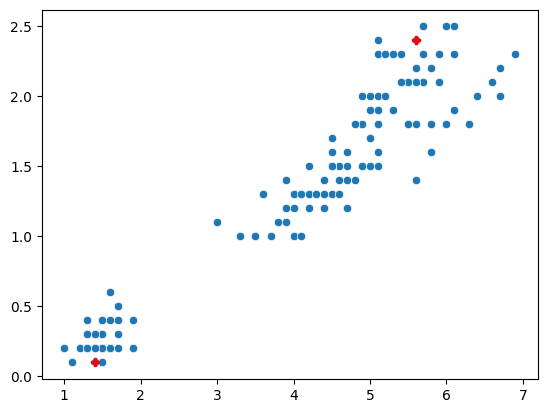

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1])
plt.plot(X[centroid_index[0],0], X[centroid_index[0],1], 'Pr')
plt.plot(X[centroid_index[1],0], X[centroid_index[1],1], 'Pr')

In [ ]:
dist_to_centroids = []
clusters = []
for i in range(len(X)):
    dist_to_centroids += [np.array([euclidean(X[i], X[centroid_index[0]]), 
                         euclidean(X[i], X[centroid_index[1]])])]
    clusters += [np.where(dist_to_centroids[-1] == dist_to_centroids[-1].min())[0][0]]
dist_to_centroids[45:55], clusters[45:55]

([array([0.2       , 4.69574275]),
  array([0.2236068 , 4.56508488]),
  array([0.1       , 4.74130784]),
  array([0.14142136, 4.65295605]),
  array([0.1       , 4.74130784]),
  array([3.54682957, 1.3453624 ]),
  array([3.40147027, 1.42126704]),
  array([3.76961536, 1.14017543]),
  array([2.86356421, 1.94164878]),
  array([3.49284984, 1.3453624 ])],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

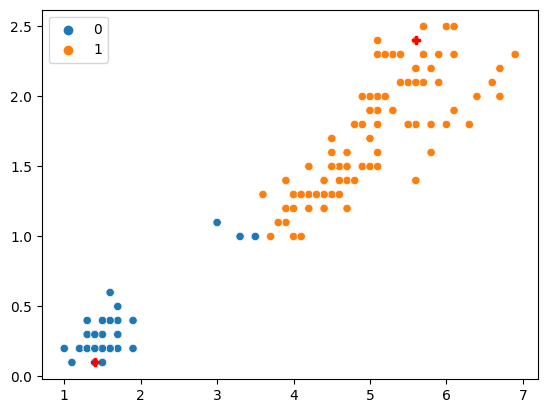

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters)
plt.plot(X[centroid_index[0],0], X[centroid_index[0],1], 'Pr')
plt.plot(X[centroid_index[1],0], X[centroid_index[1],1], 'Pr')

In [ ]:
clusters = np.array(clusters)
cl0 = np.where(clusters == 0)[0]
cl1 = np.where(clusters)[0]
cl0_centroid, cl1_centroid = X[cl0,:].mean(axis=0), X[cl1,:].mean(axis=0)
cl0, cl1,cl0_centroid, cl1_centroid

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 57,
        60, 79, 93, 98]),
 array([ 50,  51,  52,  53,  54,  55,  56,  58,  59,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  94,  95,  96,  97,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
        120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149]),
 array([1.63090909, 0.31636364]),
 array([4.98947368, 1.71052632]))

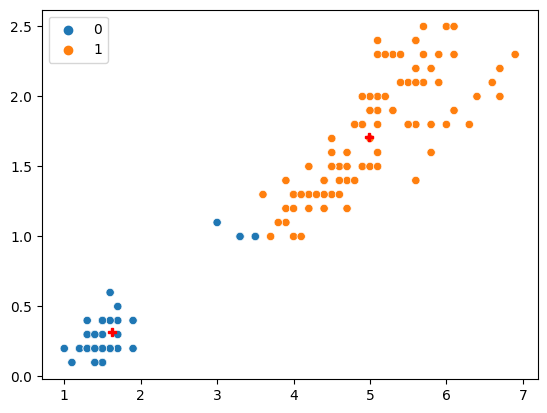

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters)
plt.plot(cl0_centroid[0], cl0_centroid[1], 'Pr')
plt.plot(cl1_centroid[0], cl1_centroid[1], 'Pr')

In [ ]:
dist_to_centroids = []
clusters = []
for i in range(len(X)):
    dist_to_centroids += [np.array([euclidean(X[i], cl0_centroid), 
                         euclidean(X[i], cl1_centroid)])]
    clusters += [np.where(dist_to_centroids[-1] == dist_to_centroids[-1].min())[0][0]]
dist_to_centroids[45:55], clusters[45:55]

([array([0.23148818, 3.8566703 ]),
  array([0.12039879, 3.71082492]),
  array([0.25857205, 3.89435631]),
  array([0.17515047, 3.80238298]),
  array([0.25857205, 3.89435631]),
  array([3.25477907, 0.42452515]),
  array([3.10365554, 0.53282813]),
  array([3.47677299, 0.22875067]),
  array([2.56517684, 1.07125628]),
  array([3.19632537, 0.44273139])],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 57 93 98] [ 50  51  52  53  54  55  56  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  94  95  96  97  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149] [1.56037736 0.29056604] [4.95876289 1.69587629]


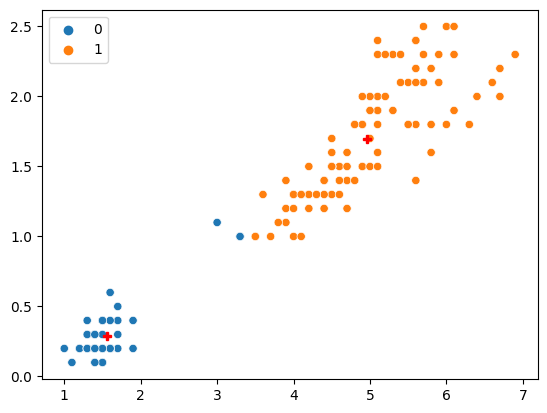

In [ ]:
clusters = np.array(clusters)
cl0 = np.where(clusters == 0)[0]
cl1 = np.where(clusters)[0]
cl0_centroid, cl1_centroid = X[cl0,:].mean(axis=0), X[cl1,:].mean(axis=0)
print(cl0, cl1,cl0_centroid, cl1_centroid)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters)
plt.plot(cl0_centroid[0], cl0_centroid[1], 'Pr')
plt.plot(cl1_centroid[0], cl1_centroid[1], 'Pr')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 98] [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149] [1.49215686 0.2627451 ] [4.92525253 1.68181818]


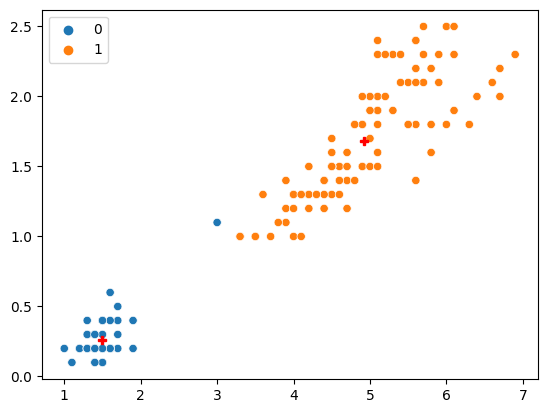

In [ ]:
dist_to_centroids = []
clusters = []
for i in range(len(X)):
    dist_to_centroids += [np.array([euclidean(X[i], cl0_centroid), 
                         euclidean(X[i], cl1_centroid)])]
    clusters += [np.where(dist_to_centroids[-1] == dist_to_centroids[-1].min())[0][0]]
dist_to_centroids[45:55], clusters[45:55]

clusters = np.array(clusters)
cl0 = np.where(clusters == 0)[0]
cl1 = np.where(clusters)[0]
cl0_centroid, cl1_centroid = X[cl0,:].mean(axis=0), X[cl1,:].mean(axis=0)
print(cl0, cl1,cl0_centroid, cl1_centroid)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters)
plt.plot(cl0_centroid[0], cl0_centroid[1], 'Pr')
plt.plot(cl1_centroid[0], cl1_centroid[1], 'Pr')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 98] [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149] [1.49215686 0.2627451 ] [4.92525253 1.68181818]


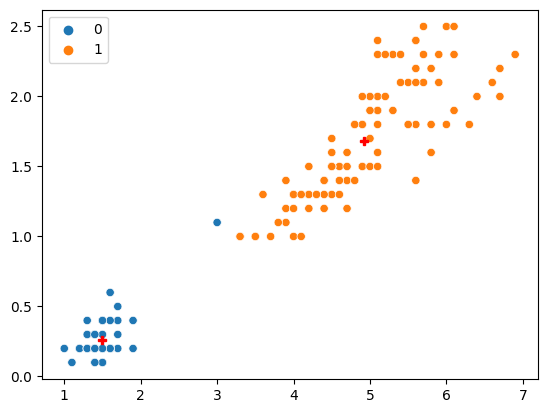

In [ ]:
dist_to_centroids = []
clusters = []
for i in range(len(X)):
    dist_to_centroids += [np.array([euclidean(X[i], cl0_centroid), 
                         euclidean(X[i], cl1_centroid)])]
    clusters += [np.where(dist_to_centroids[-1] == dist_to_centroids[-1].min())[0][0]]
dist_to_centroids[45:55], clusters[45:55]

clusters = np.array(clusters)
cl0 = np.where(clusters == 0)[0]
cl1 = np.where(clusters)[0]
cl0_centroid, cl1_centroid = X[cl0,:].mean(axis=0), X[cl1,:].mean(axis=0)
print(cl0, cl1,cl0_centroid, cl1_centroid)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters)
plt.plot(cl0_centroid[0], cl0_centroid[1], 'Pr')
plt.plot(cl1_centroid[0], cl1_centroid[1], 'Pr')

### K-means

- Init centroids
- While not convergence
  - For each observation: 
    - Caculate distance to each centroid
    - Assign observation to the cluster which centroid the distance was minimimum 
    - Recalculate centroids
- Repeat until convergence

*Scale the data: https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering

Text(0, 0.5, 'X2: Petal Width')

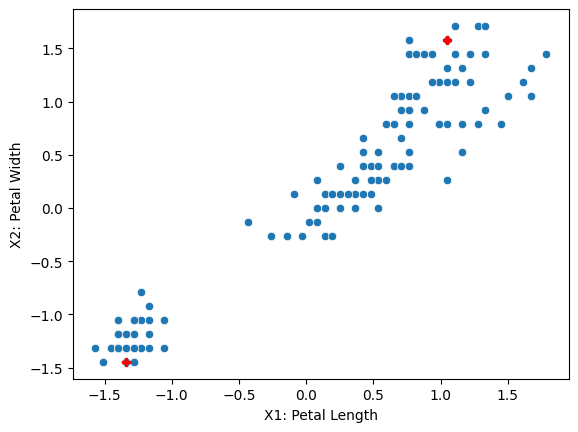

In [ ]:
np.random.seed(1)
centroid_index = np.random.randint(len(X), size=2)

# Z-score normalization 
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

centroid_values = np.array([(xi, yi) for xi, yi in zip(X[centroid_index,0], X[centroid_index,1])])

sns.scatterplot(x=X[:,0], y=X[:,1])
#plt.vlines(X[:50,0].mean(), X[:50,0].min(), X[:50,0].max(), linestyles="dotted")
#plt.hlines(X[:50,1].mean(), X[:50,1].min(), X[:50,1].max(), linestyles="dotted")

#plt.vlines(X[50:,0].mean(), X[50:,0].min(), X[50:,0].max(), linestyles="dotted")
#plt.hlines(X[50:,1].mean(), X[50:,1].min(), X[50:,1].max(), linestyles="dotted")

plt.plot(centroid_values[0][0], centroid_values[0][1], 'Pr')
plt.plot(centroid_values[1][0], centroid_values[1][1], 'Pr')


plt.xlabel('X1: Petal Length')
plt.ylabel('X2: Petal Width')

((array([0, 1]), array([60, 90])),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 57,
        60, 62, 67, 69, 79, 80, 81, 93, 98]),
 array([ 50,  51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,
         66,  68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,  97,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
        138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]))

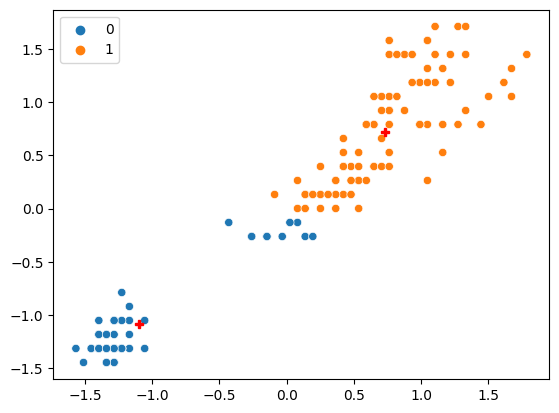

In [ ]:
def euclidean_distance(p1, p2):
    # Two points p1: (x1, y1), p2: (x1, y1)
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

group_assigned = []
for obs_i in range(len(X)):
    distances = np.array([euclidean_distance(X[obs_i], centroid_values[0]), 
    euclidean_distance(X[obs_i], centroid_values[1])])
    group_assigned += [np.where(distances == distances.min())[0][0]]
    #print(X[obs_i][0], X[obs_i][1], np.where(distances == distances.min())[0])

group_assigned = np.array(group_assigned)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=group_assigned)

c0 = np.where(group_assigned == 0)[0]
c1 = np.where(group_assigned == 1)[0]

plt.plot(X[c0,0].mean(), X[c0,1].mean(), 'Pr')
plt.plot(X[c1,0].mean(), X[c1,1].mean(), 'Pr')

np.unique(group_assigned, return_counts=True), c0, c1

[[-1.10150933 -1.0828941 ]
 [ 0.73433956  0.7219294 ]]


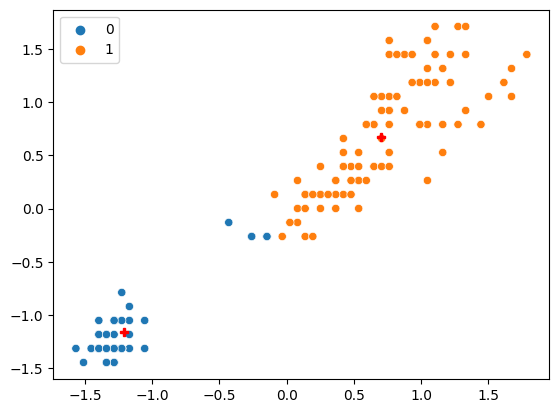

(array([0, 1]), array([55, 95])) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 57 60 79 93 98] [ 50  51  52  53  54  55  56  58  59  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  80  81  82  83  84  85  86  87  88
  89  90  91  92  94  95  96  97  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
[[-1.20898374 -1.1622723 ]
 [ 0.69993796  0.67289449]]


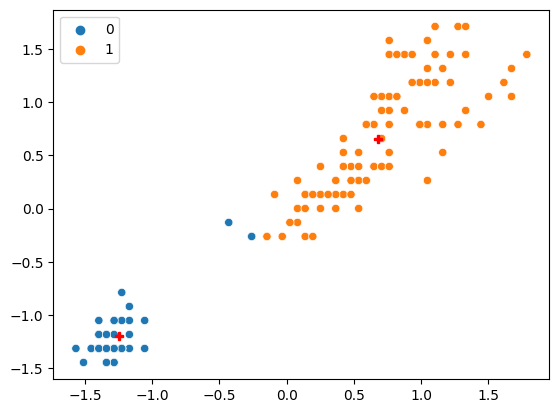

(array([0, 1]), array([53, 97])) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 57 93 98] [ 50  51  52  53  54  55  56  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  94  95  96  97  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149]
[[-1.24907216 -1.19623024]
 [ 0.68248273  0.65361034]]


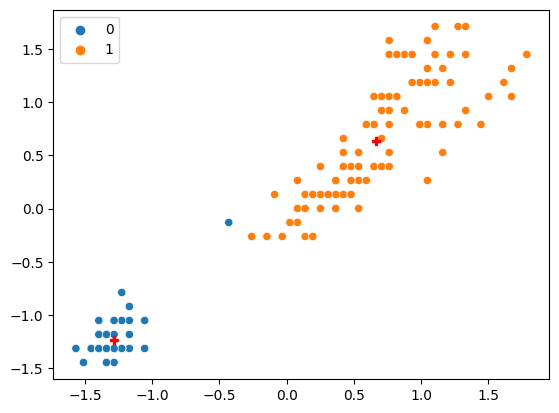

(array([0, 1]), array([51, 99])) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 98] [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149]
[[-1.28784694 -1.23285155]
 [ 0.6634363   0.63510534]]


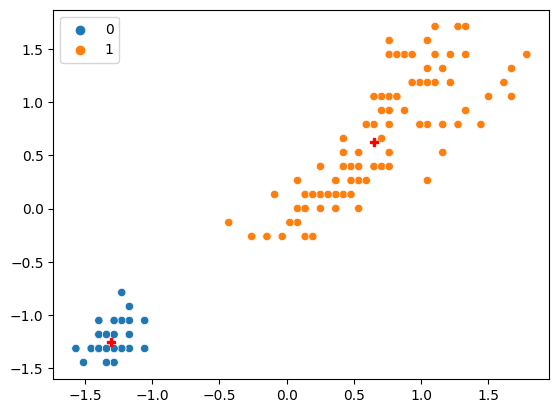

(array([0, 1]), array([ 50, 100])) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
[[-1.30498732 -1.25489349]
 [ 0.65249366  0.62744675]]


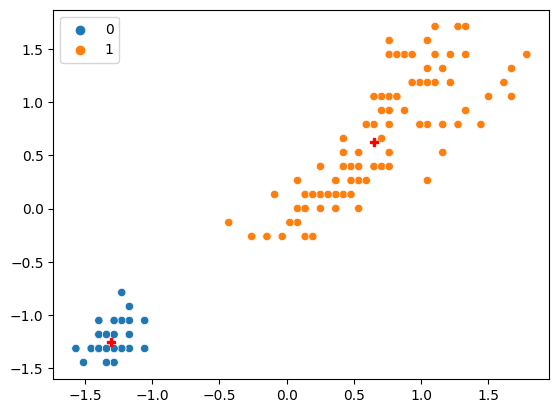

(array([0, 1]), array([ 50, 100])) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]


In [ ]:
for i in range(5):

    centroid_values[0] = X[c0].mean(axis=0)
    centroid_values[1] = X[c1].mean(axis=0)

    print(centroid_values)

    group_assigned = []
    for obs_i in range(len(X)):
        distances = np.array([euclidean_distance(X[obs_i], centroid_values[0]), 
        euclidean_distance(X[obs_i], centroid_values[1])])
        group_assigned += [np.where(distances == distances.min())[0][0]]
        #print(X[obs_i][0], X[obs_i][1], np.where(distances == distances.min())[0])

    group_assigned = np.array(group_assigned)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=group_assigned)

    c0 = np.where(group_assigned == 0)[0]
    c1 = np.where(group_assigned == 1)[0]

    plt.plot(X[c0,0].mean(), X[c0,1].mean(), 'Pr')
    plt.plot(X[c1,0].mean(), X[c1,1].mean(), 'Pr')
    plt.show()

    print(np.unique(group_assigned, return_counts=True), c0, c1)

In [ ]:
# Use final centroids
centroid_values[0] = X[c0].mean(axis=0)
centroid_values[1] = X[c1].mean(axis=0)

c0_inertia = np.sqrt((X[c0,0]-centroid_values[0][0])**2 + (X[c0,1] - centroid_values[0][1])**2).sum()
c1_inertia = np.sqrt((X[c1,0]-centroid_values[1][0])**2 + (X[c1,1] - centroid_values[1][1])**2).sum()
c0_inertia, c1_inertia

(7.148533684454468, 64.27294854466366)

![](https://media.geeksforgeeks.org/wp-content/uploads/20190606105550/distortion1.png)

0 18.81761147734382


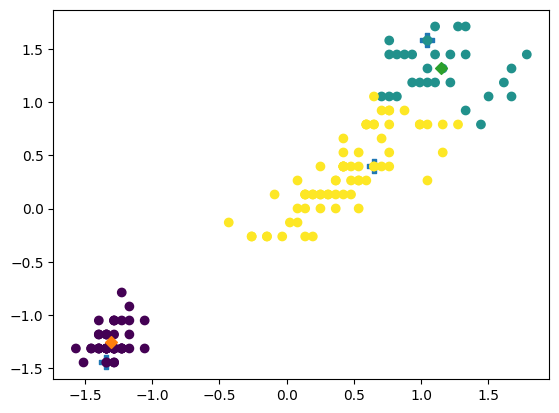

1 18.263221207159678


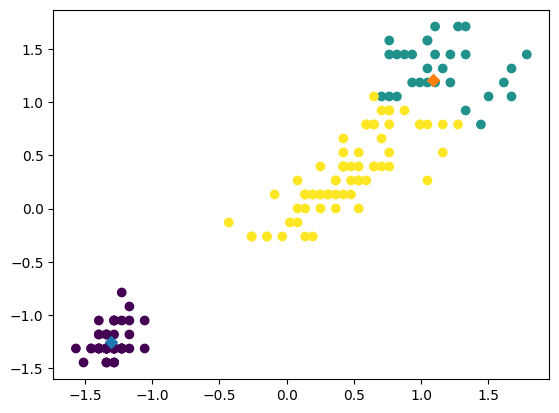

2 18.851184793403714


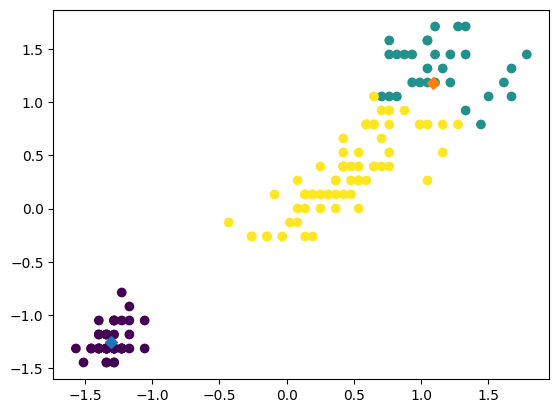

3 18.936707921172815


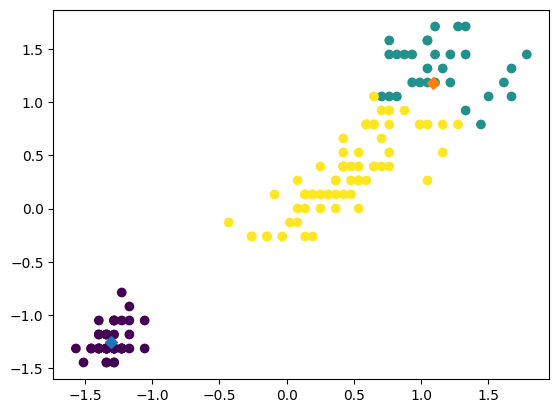

4 18.936707921172815


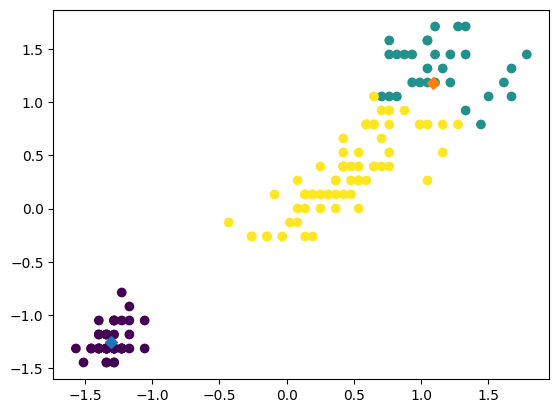

In [ ]:
from scipy.spatial.distance import euclidean

# inertia_float
# Sum of (squared*) distances of samples to their closest cluster center
def inertia(X1, X2, clusters, y, centroid_values):
    inertia_values = []
    for ci in clusters:
        distance_ci = 0
        for obs_i in ci:
            distance_ci += euclidean([X1[obs_i], X2[obs_i]], centroid_values[y[obs_i]])
        inertia_values += [distance_ci]
    return np.array(inertia_values)

np.random.seed(1)

k = 3  # number of clusters, number of centroids

n_obs = len(X)
centroid_index = np.random.choice(range(n_obs), size=k)
centroid_values = np.array([(xi, yi) for xi, yi in zip(X[centroid_index,0], X[centroid_index,1])])
centroid_index, centroid_values

#i = 130

clusters = [[centroid_index[i]] for i in range(k)]
clusters

max_iter = 10

plt.scatter(X[centroid_index,0], X[centroid_index,1], marker='P', s=100)

inertia_iter = []

for mi in range(max_iter):
    for i in range(n_obs):
        distance_to_centroids = np.array([euclidean([X[i,0], X[i,1]], centroid_values[ki]) for ki in range(k)])
        clusters[np.where(distance_to_centroids == distance_to_centroids.min())[0][0]] += [i]
    len(clusters[0]), len(clusters[1])
    clusters = [list(set(clusters[ki])) for ki in range(k)]
    y = np.zeros(n_obs, dtype='int')
    for li, ci in enumerate(np.array(clusters, dtype='object')): y[ci]=li  # This is the assigned y label by k-means

    inertia_iter += [inertia(X[:,0], X[:,1], clusters, y, centroid_values).mean()]
    print(mi, inertia_iter[-1])

    centroid_values = [[X[clusters[ki],0].mean(), X[clusters[ki],1].mean()] for ki in range(k)]

    y, len(clusters[0]), len(clusters[1]), centroid_values
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.scatter(X[clusters[0],0].mean(), X[clusters[0],1].mean(), marker='D')
    plt.scatter(X[clusters[1],0].mean(), X[clusters[1],1].mean(), marker='D')
    plt.show()

    if mi > 0:
        if np.isclose(inertia_iter[-1], inertia_iter[-2]):
            break

### TO DO

- Scale the data (standardize)
- Identify best number of clusters

In [ ]:
sinertia(X[:,0], X[:,1], clusters, y, centroid_values)

array([10.2077279 , 21.72830382, 33.16000409])

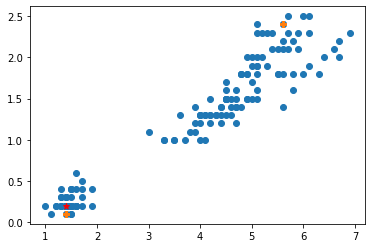

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[centroid_index,0], X[centroid_index,1], marker='P')
plt.scatter(X[i,0], X[i,1], marker='*', c='r')

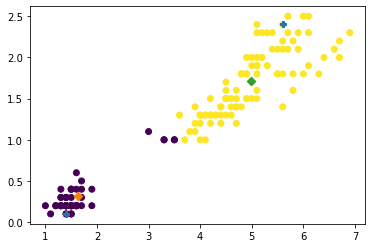

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X[centroid_index,0], X[centroid_index,1], marker='P')
plt.scatter(X[clusters[0],0].mean(), X[clusters[0],1].mean(), marker='D')
plt.scatter(X[clusters[1],0].mean(), X[clusters[1],1].mean(), marker='D')

In [ ]:
len(clusters)

3

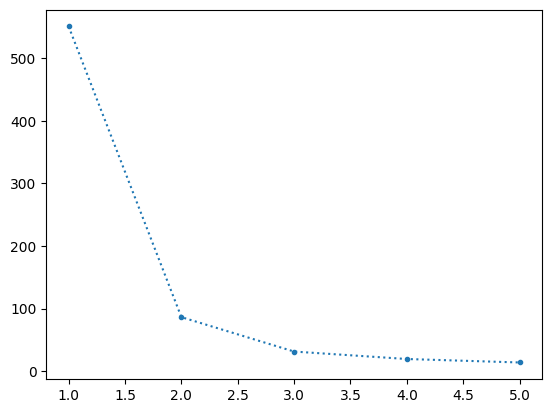

In [ ]:
# Importamos el objeto cluster 
from sklearn import cluster
iris = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/iris.csv",
                  index_col = 0)
X = iris[["Petal.Length", "Petal.Width"]]
# Definimos nuestro objeto cluster Kmeans para 3 clústeres/centroides
inertia = []
for ki in range(1, 6):
    km = cluster.KMeans(n_clusters=ki)
    km.fit(X)
    inertia += [km.inertia_]
plt.plot(range(1, 6), inertia, ':.')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>